In [ ]:
%matplotlib inline


# Detección de anomalías con IsolationForest


El algoritmo IsolationForest 'identifica' las observaciones anómalas escogiendo al azar una variable
y después dividiendo la muestra usando un valor al azar entre el mínimo y máximo valor de dicha variable.

La división recursiva de representa por una estructura de árbol, y el número de divisiones necesarias para aislar una observación es proporcional a la profundidad del árbol desde el nodo raíz al nodo terminal.
Dicha profunidad, promediada sobre muchos árboles, es una medida de la normalidad de la observación, y es la base para la función de decisión de este método.

Las divisiones aleatorias producen caminos mucho más cortos para aislar las anomalías, así que si un bosque de árboles aleatorios tiene longitudes más cortas para llegar a una observación, está será muy probablemente cataloga como una anomalía.

Más información en el paper:

.. [1] Liu, Fei Tony, Ting, Kai Ming and Zhou, Zhi-Hua. "Isolation forest."
    Data Mining, 2008. ICDM'08. Eighth IEEE International Conference on.




Cargamos el paquete

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Generamos los datos para entrenamiento y test, tomando muestras de dos distribuciones diferentes.

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

Entrenamos el modelo y predecimos sobre el conjunto de test para encontrar outliers

In [3]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

Por último, pintamos las curvas de nivel de la función de decisión

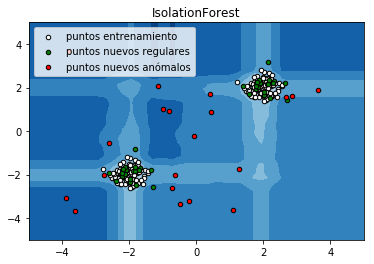

In [9]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["puntos entrenamiento",
            "puntos nuevos regulares", "puntos nuevos anómalos"],
           loc="upper left")
plt.show()